In [97]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time

In [98]:
url_for_crime_and_safety = "https://www.numbeo.com/crime/rankings_by_country.jsp"
url_for_cost_of_living= "https://www.numbeo.com/cost-of-living/rankings_by_country.jsp"
url_for_health="https://www.numbeo.com/health-care/rankings_by_country.jsp"
url_for_pollution= "https://www.numbeo.com/pollution/rankings_by_country.jsp"
url_for_climate="https://weatherandclimate.com/countries"
url_for_quality_of_life="https://www.numbeo.com/quality-of-life/rankings_by_country.jsp"

In [99]:
response = requests.get(url_for_crime_and_safety)
soup = BeautifulSoup(response.content, "html.parser")

In [100]:
# Storage
Country_Names,Crime_Indexes, Safety_Indexes = [], [],[]
Pollution_Indexes=[]
Healthcare_Indexes=[]
Costs_Of_Living=[]
Climate_Indexes=[]
Rents_Indexes=[]
Groceries_Indexes=[]
Quality_Indexes=[]

In [101]:
table=soup.tbody
rows = table.find_all("tr")

for row in rows:
    tds = row.find_all("td")
    # extract the values
    countryName=tds[1].text.strip() if len(tds)>1 else None
    crimeIndex = tds[2].text.strip() if len(tds) > 2 else None
    safetyIndex = tds[3].text.strip() if len(tds) > 3 else None

    Country_Names.append(countryName)
    Crime_Indexes.append(crimeIndex)
    Safety_Indexes.append(safetyIndex)

df1 = pd.DataFrame({
    "Country": Country_Names,
    "Crime Index": Crime_Indexes,
    "Safety Index": Safety_Indexes,
})

print(df1)

                  Country Crime Index Safety Index
0               Venezuela        80.7         19.3
1        Papua New Guinea        80.3         19.7
2                   Haiti        78.9         21.1
3             Afghanistan        75.1         24.9
4            South Africa        74.7         25.3
..                    ...         ...          ...
142                  Oman        18.3         81.7
143                Taiwan        17.1         82.9
144                 Qatar        15.8         84.2
145  United Arab Emirates        15.5         84.5
146               Andorra        15.3         84.7

[147 rows x 3 columns]


In [102]:
response = requests.get(url_for_pollution)
soup = BeautifulSoup(response.content, "html.parser")

In [103]:
Country_Names=[]
table=soup.tbody
rows = table.find_all("tr")

for row in rows:
    tds = row.find_all("td")
    # extract the values
    countryName=tds[1].text.strip() if len(tds)>1 else None
    pollutionIndex = tds[2].text.strip() if len(tds) > 2 else None

    Country_Names.append(countryName)
    Pollution_Indexes.append(pollutionIndex)

df2 = pd.DataFrame({
    "Country": Country_Names,
    "Pollution Index": Pollution_Indexes,
})

print(df2)

      Country Pollution Index
0    Cameroon            93.7
1     Myanmar            89.8
2     Lebanon            89.4
3     Nigeria            87.9
4    Mongolia            87.8
..        ...             ...
108    Norway            18.3
109    Sweden            17.6
110   Estonia            17.0
111   Iceland            16.0
112   Finland            11.8

[113 rows x 2 columns]


In [104]:
response = requests.get(url_for_quality_of_life)
soup = BeautifulSoup(response.content, "html.parser")

In [105]:
Country_Names=[]
table=soup.tbody
rows = table.find_all("tr")

for row in rows:
    tds = row.find_all("td")
    # extract the values
    countryName=tds[1].text.strip() if len(tds)>1 else None
    qualities = tds[2].text.strip() if len(tds) > 2 else None

    Country_Names.append(countryName)
    Quality_Indexes.append(qualities)

df3 = pd.DataFrame({
    "Country": Country_Names,
    "Quality Of Life Index": Quality_Indexes,
})

print(df3)

        Country Quality Of Life Index
0    Luxembourg                 220.1
1   Netherlands                 211.3
2       Denmark                 209.9
3          Oman                 208.9
4   Switzerland                 205.0
..          ...                   ...
83        Egypt                  85.3
84    Sri Lanka                  81.1
85    Venezuela                  79.7
86   Bangladesh                  73.9
87      Nigeria                  21.5

[88 rows x 2 columns]


In [106]:
response = requests.get(url_for_health)
soup = BeautifulSoup(response.content, "html.parser")

In [107]:
Country_Names=[]
table=soup.tbody
rows = table.find_all("tr")

for row in rows:
    tds = row.find_all("td")
    # extract the values
    countryName=tds[1].text.strip() if len(tds)>1 else None
    healthcareIndex = tds[2].text.strip() if len(tds) > 2 else None

    Country_Names.append(countryName)
    Healthcare_Indexes.append(healthcareIndex)

df4 = pd.DataFrame({
    "Country": Country_Names,
    "HealthCare Index": Healthcare_Indexes,
})

print(df4)

        Country HealthCare Index
0        Taiwan             86.5
1   South Korea             82.8
2         Japan             80.0
3   Netherlands             79.3
4       Denmark             78.4
..          ...              ...
92        Egypt             47.3
93      Morocco             46.8
94         Iraq             45.9
95   Bangladesh             42.2
96    Venezuela             38.7

[97 rows x 2 columns]


In [108]:
response = requests.get(url_for_cost_of_living)
soup = BeautifulSoup(response.content, "html.parser")

In [109]:
Country_Names=[]
table=soup.tbody
rows = table.find_all("tr")

for row in rows:
    tds = row.find_all("td")
    # extract the values
    countryName=tds[1].text.strip() if len(tds)>1 else None
    costOfliving = tds[2].text.strip() if len(tds) > 2 else None
    rentIndex=tds[3].text.strip() if len(tds)>3 else None
    groceriesIndex=tds[5].text.strip() if len(tds)>3 else None

    Country_Names.append(countryName)
    Costs_Of_Living.append(costOfliving)
    Rents_Indexes.append(rentIndex)
    Groceries_Indexes.append(groceriesIndex)

df5 = pd.DataFrame({
    "Country": Country_Names,
    "Cost Of Living Index": Costs_Of_Living,
    "Rent Index":Rents_Indexes,
    "Groceries Index":Groceries_Indexes
})

print(df5)

               Country Cost Of Living Index Rent Index Groceries Index
0    Us Virgin Islands                 98.4       46.4           106.3
1          Switzerland                 98.4       45.2           103.1
2              Iceland                 83.4       43.7            90.3
3              Bahamas                 81.4       46.9            79.1
4            Singapore                 79.1       67.0            70.8
..                 ...                  ...        ...             ...
134        Afghanistan                 19.9        2.0            17.3
135              India                 19.5        5.0            22.5
136              Egypt                 19.0        3.5            19.7
137              Libya                 18.6        3.9            22.8
138           Pakistan                 17.8        2.9            17.2

[139 rows x 4 columns]


In [110]:
response = requests.get(url_for_climate)
soup = BeautifulSoup(response.content, "html.parser")

In [111]:
Country_Names=[]
Climate_Indexes=[]
table=soup.table
rows = table.find_all("tr")

for row in rows[1:]:
    tds = row.find_all("td")
    country=row.find("a")
    # extract the values
    countryName=country.text.strip()
    if tds[3]:
        temperature=tds[3].text.strip()
    else:
       temperature=None
    Climate_Indexes.append(temperature)
    Country_Names.append(countryName)

df6 = pd.DataFrame({
    "Country": Country_Names,
    "Temperature": Climate_Indexes,
})

print(df6)

               Country Temperature
0          Afghanistan        15.7
1              Albania       15.17
2              Algeria        20.0
3       American Samoa        28.0
4              Andorra        7.17
..                 ...         ...
241  Wallis and Futuna       28.13
242     Western Sahara       26.74
243              Yemen       25.53
244             Zambia       23.33
245           Zimbabwe       22.73

[246 rows x 2 columns]


In [112]:
merged_df = df1.merge(df2, on='Country', how='outer') \
               .merge(df3, on='Country', how='outer') \
               .merge(df4, on='Country', how='outer') \
               .merge(df5, on='Country', how='outer') \
               .merge(df6, on='Country', how='outer')

print(merged_df.head(10))
display5(merged_df)

               Country Crime Index Safety Index Pollution Index  \
0          Afghanistan        75.1         24.9            84.4   
1              Albania        44.7         55.3            77.0   
2              Algeria        52.6         47.4            63.9   
3       American Samoa         NaN          NaN             NaN   
4              Andorra        15.3         84.7             NaN   
5               Angola        66.3         33.7             NaN   
6             Anguilla         NaN          NaN             NaN   
7  Antigua and Barbuda         NaN          NaN             NaN   
8            Argentina        63.4         36.6            50.8   
9              Armenia        22.1         77.9            62.3   

  Quality Of Life Index HealthCare Index Cost Of Living Index Rent Index  \
0                   NaN              NaN                 19.9        2.0   
1                 104.3             48.2                 39.9       11.7   
2                   NaN           

,Country,Crime Index,Safety Index,Pollution Index,Quality Of Life Index,HealthCare Index,Cost Of Living Index,Rent Index,Groceries Index,Temperature
0,Afghanistan,75.1,24.9,84.4,NaN,NaN,19.9,2.0,17.3,15.7
1,Albania,44.7,55.3,77.0,104.3,48.2,39.9,11.7,40.4,15.17
2,Algeria,52.6,47.4,63.9,NaN,54.5,24.5,3.4,33.2,20.0
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
4,Andorra,15.3,84.7,NaN,NaN,NaN,NaN,NaN,NaN,7.17
...,...,...,...,...,...,...,...,...,...,...
251,Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.13
252,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.74
253,Yemen,63.7,36.3,NaN,NaN,NaN,48.4,5.9,61.5,25.53
254,Zambia,45.6,54.4,NaN,NaN,NaN,33.8,9.8,29.0,23.33


In [113]:
import pandas as pd
import numpy as np
df=merged_df

# Step 1: Strip column names and remove leading/trailing whitespaces
df.columns = df.columns.str.strip()

# Step 2: Clean string entries inside the DataFrame (whitespace)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Step 3: Convert all numeric columns to floats (ignoring 'Country')
for col in df.columns:
    if col != 'Country':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 4: Drop exact duplicate rows if any
df.drop_duplicates(inplace=True)

# Step 5: Reset index
df.reset_index(drop=True, inplace=True)

# Step 6: Optional - Handle missing values
# Drop rows where ALL indices except 'Country' are NaN
df = df.dropna(subset=df.columns.difference(['Country']), how='all')

# Optional: Impute missing values with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Step 7: Display summary
print(df.shape)
print(df.describe())


display(df)
# Optional: Save the cleaned version
# df.to_csv("cleaned_data.csv", index=False)


(254, 10)
       Crime Index  Safety Index  Pollution Index  Quality Of Life Index  \
count   254.000000    254.000000       254.000000             254.000000   
mean     45.050340     54.949660        57.082301             144.025000   
std      11.566981     11.566981        13.722816              22.909347   
min      15.300000     19.300000        11.800000              21.500000   
25%      43.250000     52.250000        57.082301             144.025000   
50%      45.050340     54.949660        57.082301             144.025000   
75%      47.750000     56.750000        58.275000             144.025000   
max      80.700000     84.700000        93.700000             220.100000   

       HealthCare Index  Cost Of Living Index  Rent Index  Groceries Index  \
count        254.000000            254.000000  254.000000       254.000000   
mean          63.940206             41.308633   16.005036        42.735252   
std            6.098199             11.777330    8.549129        12.450

<ipython-input-113-c69122b536d9>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,Country,Crime Index,Safety Index,Pollution Index,Quality Of Life Index,HealthCare Index,Cost Of Living Index,Rent Index,Groceries Index,Temperature
0,Afghanistan,75.10000,24.90000,84.400000,144.025,63.940206,19.900000,2.000000,17.300000,15.70
1,Albania,44.70000,55.30000,77.000000,104.300,48.200000,39.900000,11.700000,40.400000,15.17
2,Algeria,52.60000,47.40000,63.900000,144.025,54.500000,24.500000,3.400000,33.200000,20.00
3,American Samoa,45.05034,54.94966,57.082301,144.025,63.940206,41.308633,16.005036,42.735252,28.00
4,Andorra,15.30000,84.70000,57.082301,144.025,63.940206,41.308633,16.005036,42.735252,7.17
...,...,...,...,...,...,...,...,...,...,...
251,Wallis and Futuna,45.05034,54.94966,57.082301,144.025,63.940206,41.308633,16.005036,42.735252,28.13
252,Western Sahara,45.05034,54.94966,57.082301,144.025,63.940206,41.308633,16.005036,42.735252,26.74
253,Yemen,63.70000,36.30000,57.082301,144.025,63.940206,48.400000,5.900000,61.500000,25.53
254,Zambia,45.60000,54.40000,57.082301,144.025,63.940206,33.800000,9.800000,29.000000,23.33


In [114]:
from sklearn.preprocessing import StandardScaler

# Drop 'CountryName' (not numerical)
features = df.drop(columns=['Country'])

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with scaled values and same column names
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Optional: add CountryName back
scaled_df['Country'] = df['Country'].values

# Display the result
print(scaled_df.head())


    Crime Index  Safety Index  Pollution Index  Quality Of Life Index  \
0  2.603012e+00     -2.603012     1.994608e+00               0.000000   
1 -3.034775e-02      0.030348     1.454295e+00              -1.737432   
2  6.539792e-01     -0.653979     4.977958e-01               0.000000   
3  6.154982e-16      0.000000    -5.188043e-16               0.000000   
4 -2.577084e+00      2.577084    -5.188043e-16               0.000000   

   HealthCare Index  Cost Of Living Index  Rent Index  Groceries Index  \
0     -1.167469e-15             -1.821372   -1.641417    -2.046966e+00   
1     -2.586220e+00             -0.119842   -0.504558    -1.879352e-01   
2     -1.551088e+00             -1.430020   -1.477334    -7.673732e-01   
3     -1.167469e-15              0.000000    0.000000     5.718270e-16   
4     -1.167469e-15              0.000000    0.000000     5.718270e-16   

   Temperature         Country  
0    -0.722903     Afghanistan  
1    -0.792130         Albania  
2    -0.161248   

<ipython-input-115-f2d435a5f700>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


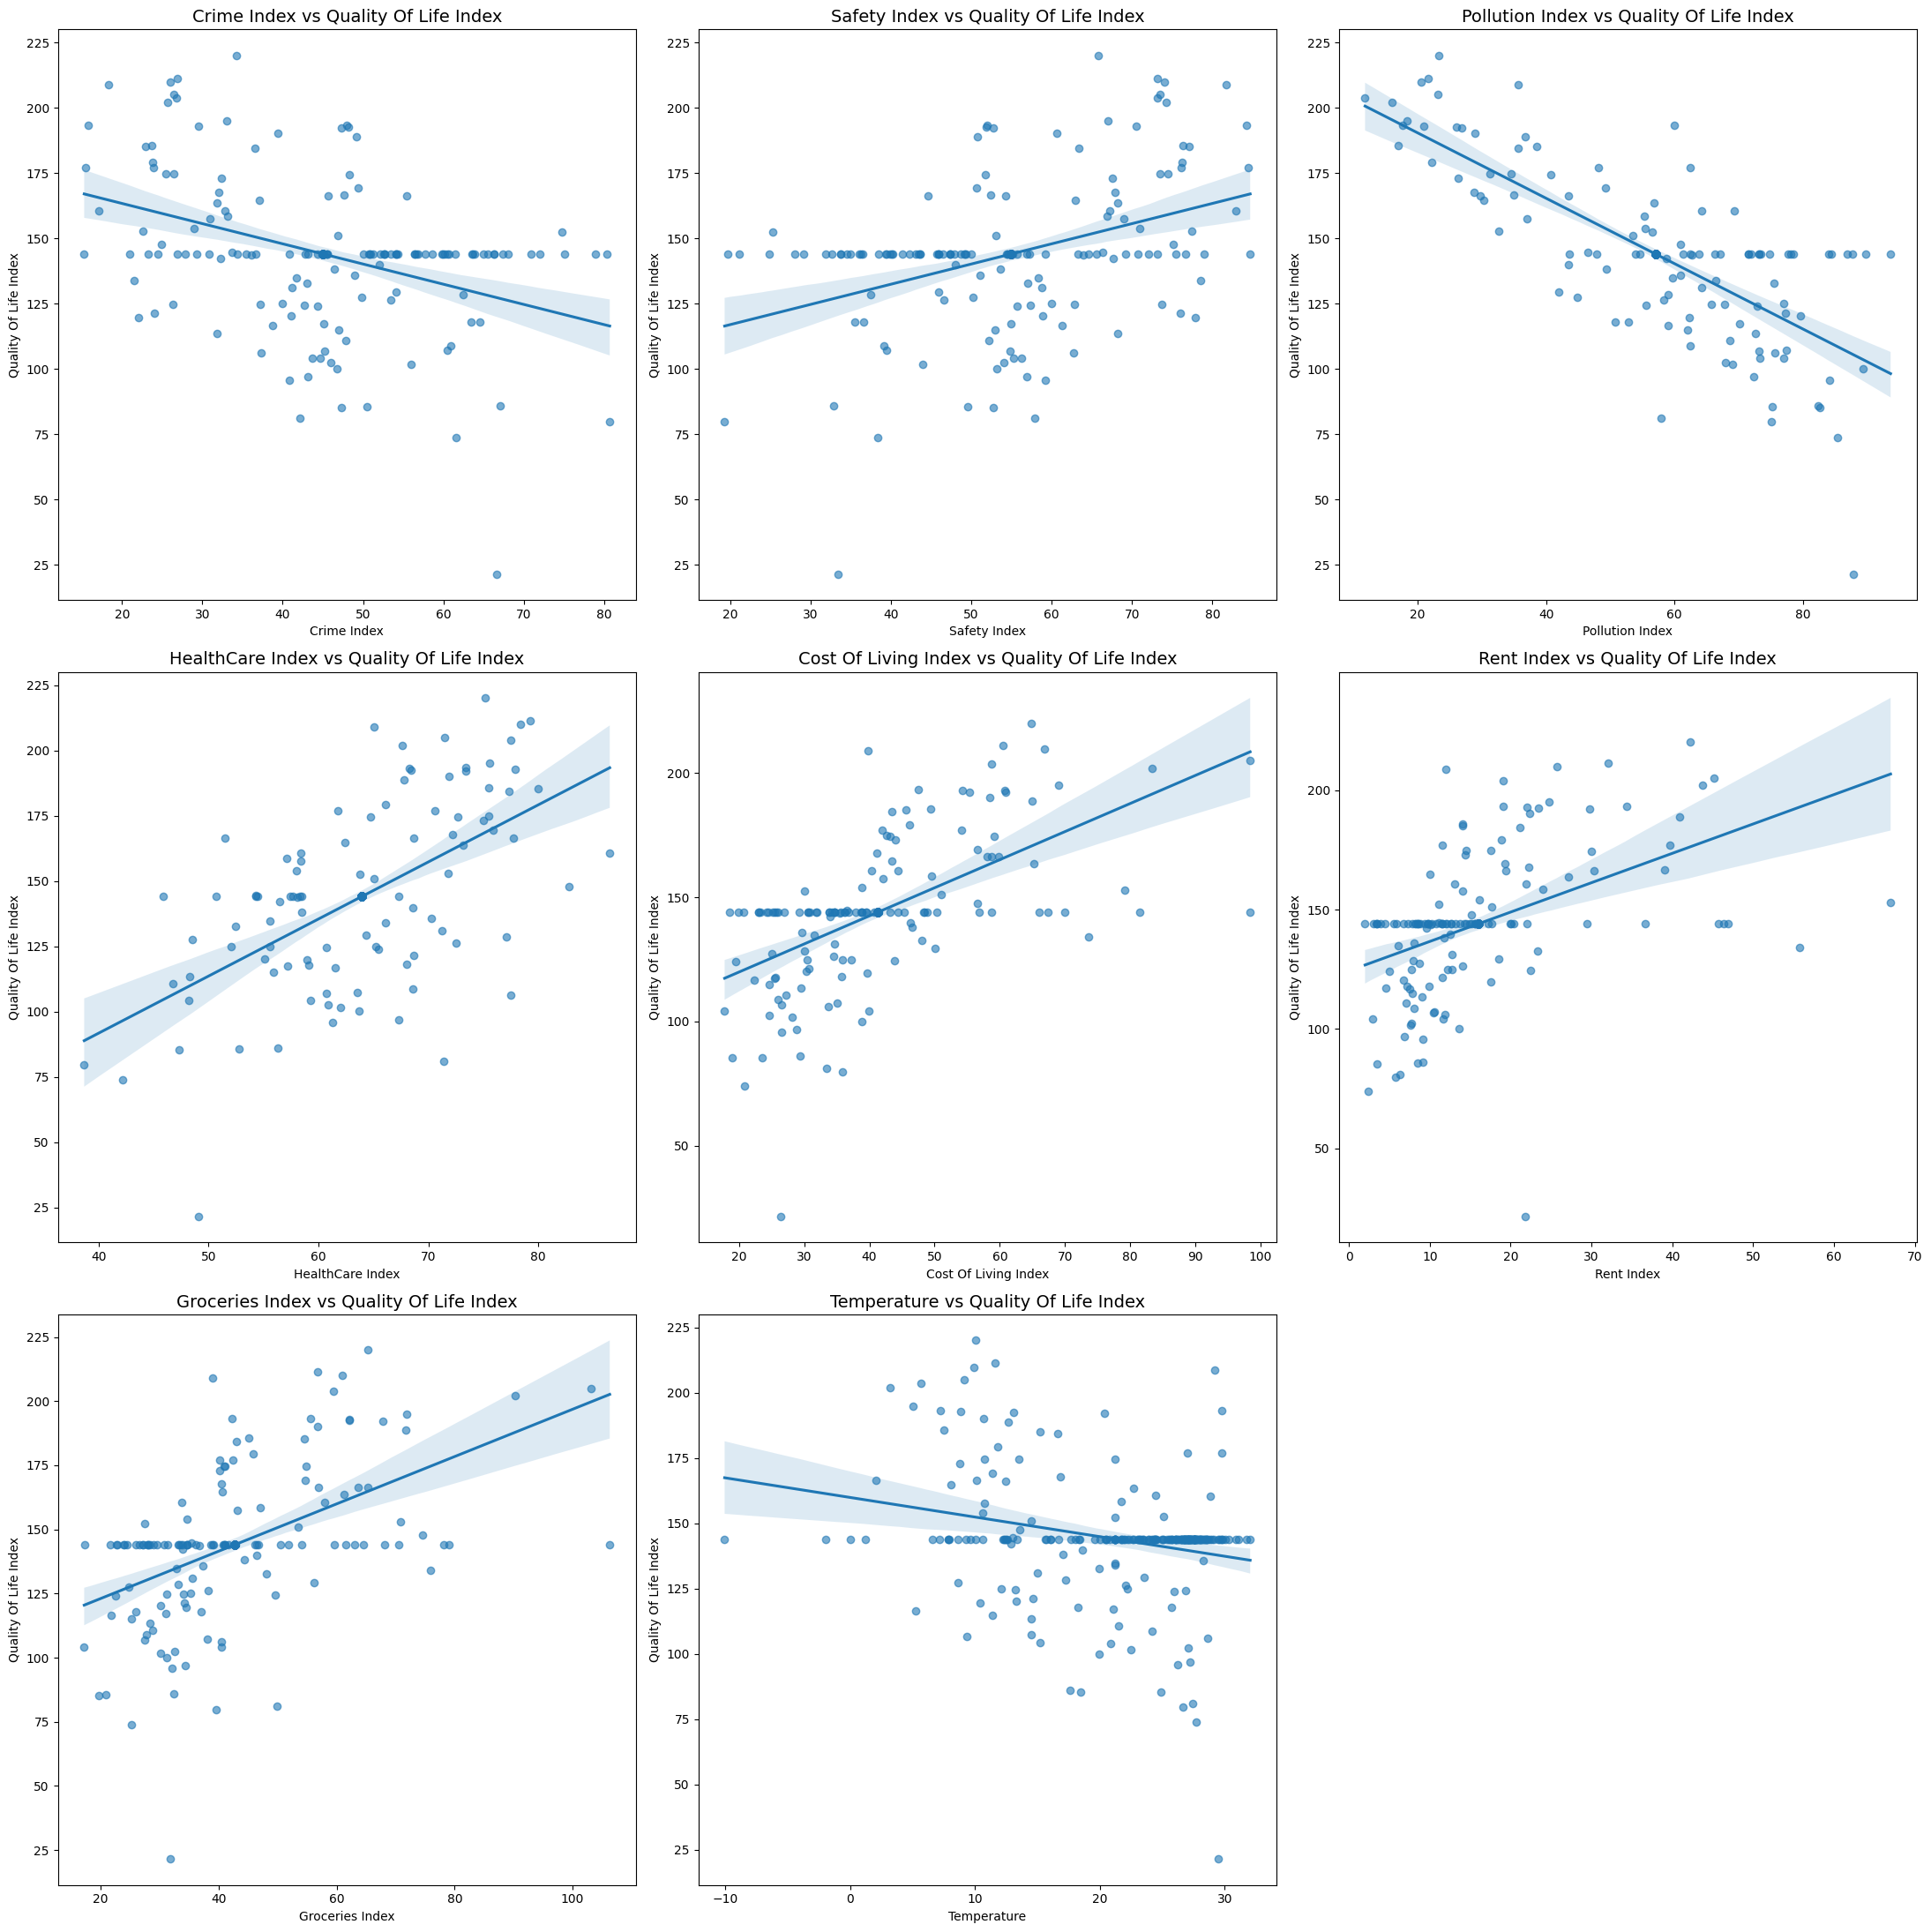

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined

# Define the features to analyze
feature_cols = [
    'Crime Index', 'Safety Index', 'Pollution Index', 'HealthCare Index',
    'Cost Of Living Index', 'Rent Index', 'Groceries Index', 'Temperature'
]

# Clean string values (if any)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Convert relevant columns to numeric, handle non-numeric values
columns_to_fix = feature_cols + ['Quality Of Life Index']
for col in columns_to_fix:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaNs in these columns
df.dropna(subset=columns_to_fix, inplace=True)

# Set up the plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(22, 22))
axes = axes.flatten()

# Create scatter plots with regression lines
for i, col in enumerate(feature_cols):
    sns.regplot(x=df[col], y=df['Quality Of Life Index'], ax=axes[i], scatter_kws={'alpha': 0.6})
    axes[i].set_title(f"{col} vs Quality Of Life Index", fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Quality Of Life Index')

# Hide any unused subplot axes (in case there are fewer than 9)
for j in range(len(feature_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


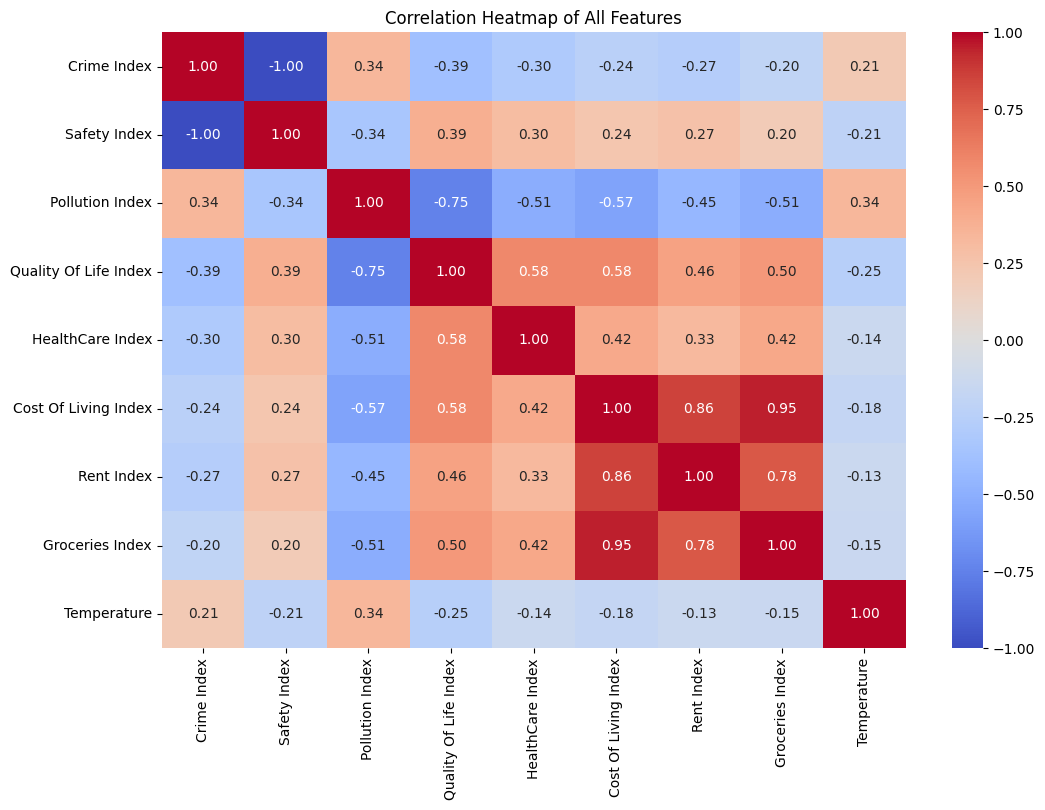

In [116]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of All Features")
plt.show()


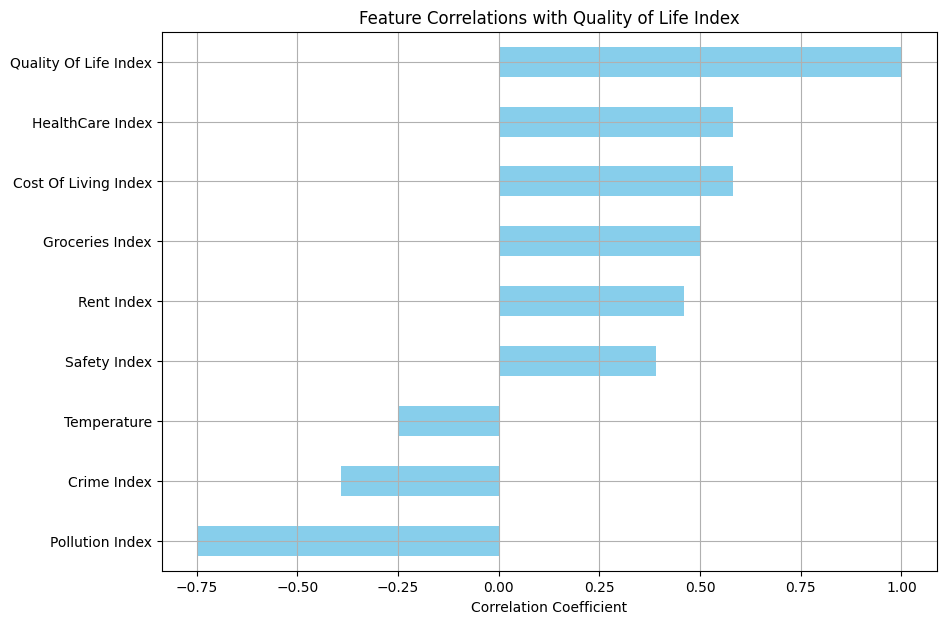

In [117]:
correlations = df.corr(numeric_only=True)['Quality Of Life Index'].sort_values()
correlations.plot(kind='barh', figsize=(10, 7), color='skyblue')
plt.title('Feature Correlations with Quality of Life Index')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.show()


<ipython-input-118-5e2980117526>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Quality Of Life Index', y='Country', palette='viridis')


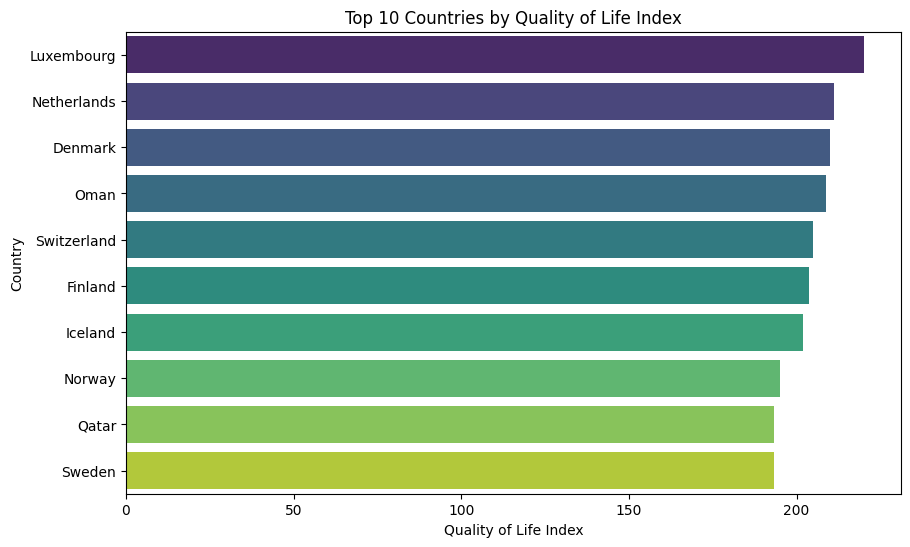

In [118]:
top_countries = df.sort_values('Quality Of Life Index', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='Quality Of Life Index', y='Country', palette='viridis')
plt.title('Top 10 Countries by Quality of Life Index')
plt.xlabel('Quality of Life Index')
plt.ylabel('Country')
plt.show()


Linear Regression - MAE: 8.2369
Random Forest - MAE: 6.9504
Gradient Boosting - MAE: 8.4764
K-Nearest Neighbors - MAE: 6.3571

✅ Best Model: K-Nearest Neighbors (MAE: 6.3571)


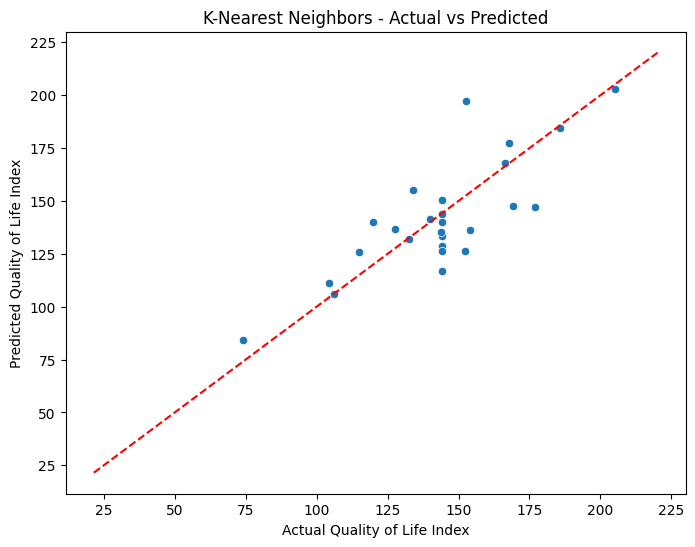

In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (assuming it's already loaded as df)

# 1. Prepare the data
df_model = df.copy()

# Drop Country column for model training
df_model = df_model.drop(columns=['Country'])

# Define features and target
X = df_model.drop(columns=['Quality Of Life Index'])
y = df_model['Quality Of Life Index']

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train multiple models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {"model": model, "mae": mae}
    print(f"{name} - MAE: {mae:.4f}")

# 4. Find the best model
best_model_name = min(results, key=lambda k: results[k]["mae"])
best_model = results[best_model_name]["model"]
print(f"\n✅ Best Model: {best_model_name} (MAE: {results[best_model_name]['mae']:.4f})")

# Optional: Plot predicted vs actual values for best model
y_best_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_best_pred)
plt.xlabel("Actual Quality of Life Index")
plt.ylabel("Predicted Quality of Life Index")
plt.title(f"{best_model_name} - Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.show()


In [121]:
2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

# 1. Get user input
user_input_dict = {}
for col in X.columns:
    value = float(input(f"Enter your preferred value for '{col}': "))
    user_input_dict[col] = value

user_input_df = pd.DataFrame([user_input_dict])

# 2. Scale the user input to match training data distribution
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
user_scaled = scaler.transform(user_input_df)

# 3. Predict the quality of life index using the best model
predicted_quality = best_model.predict(user_scaled)[0]
print(f"\n🌍 Predicted Quality of Life Index for your preferences: {predicted_quality:.4f}")

# 4. Find the most similar countries based on input features (not predicted value)
# We compute distances between the scaled user input and all scaled countries
distances = euclidean_distances(X_scaled, user_scaled)

# 5. Create a dataframe of results
df_results = pd.DataFrame({
    "Country": df["Country"],
    "Predicted Quality": best_model.predict(X_scaled),
    "Distance to You": distances.flatten()
})

# 6. Sort by distance and show top 5 closest matches
top_5 = df_results.sort_values(by="Distance to You").head(5)
print("\n🏆 Top 5 countries most similar to your preferences:\n")
print(top_5[['Country', 'Predicted Quality', 'Distance to You']])


Enter your preferred value for 'Crime Index': 5
Enter your preferred value for 'Safety Index': 4
Enter your preferred value for 'Pollution Index': 3
Enter your preferred value for 'HealthCare Index': 5
Enter your preferred value for 'Cost Of Living Index': 3
Enter your preferred value for 'Rent Index': 2
Enter your preferred value for 'Groceries Index': 2
Enter your preferred value for 'Temperature': 5

🌍 Predicted Quality of Life Index for your preferences: 130.9200

🏆 Top 5 countries most similar to your preferences:

        Country  Predicted Quality  Distance to You
18      Belarus            137.565         9.960217
150     Morocco            133.430        10.734541
104        Iraq            133.430        10.909491
16   Bangladesh            126.785        11.004742
64        Egypt            133.430        11.138268


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
